**Exercicio 01**

Neste exercício usaremos o banco mtcars Faça a regressão linear usando o preditor hp para a resposta mpg. Neste exercício iremos usar o comando lm
para fazer a regressão, esta função já vem definida na linguagem base R. Chame a função summary para ver
o resultado da regressão. Comente resultados sobre a qualidade da regressão e a importância do preditor. Faça o gráfico de dispersão de pontos e trace a reta usando o comando geom_abline da biblioteca ggplot2
(note que essa função recebe argumentos intercept e slope).
Agora use todos os preditores do banco mtcars para predizer a resposta mpg. Use o comando summary
e discuta os resultados. A variável hp possui a mesma importância do que no item anterior? Discuta o
resultado em termos de colinearidade. Você pode calcular o fator de variance inflation usando o comando
vif do pacote car

---



In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from itertools import combinations
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
df = sm.datasets.get_rdataset("mtcars", "datasets").data

In [ ]:
display(df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=50)

In [ ]:
X = df[['hp']]
y= df['mpg']

lin_model = LinearRegression()

scores = cross_val_score(lin_model, X, y, cv=kf, scoring='r2')

print(f'R2 por fold {scores}')

R2 por fold [0.0795591  0.62087468 0.65782679 0.37378904 0.55001962]


A média do nosso r2 varia entre 0,08 e 0,66 ao longos dos folds.No geral é um score bem ruim o que pode ndicar que o modelo está simples demais, e a variavel hp tem uma caoacidade limitada de explicar a variabilidade em mpg.
A variabilidade entre o r2 dos folds, sugere que a relação entre hp e mp pode não ser linear, de forma que a regressão linear não captura a relação.

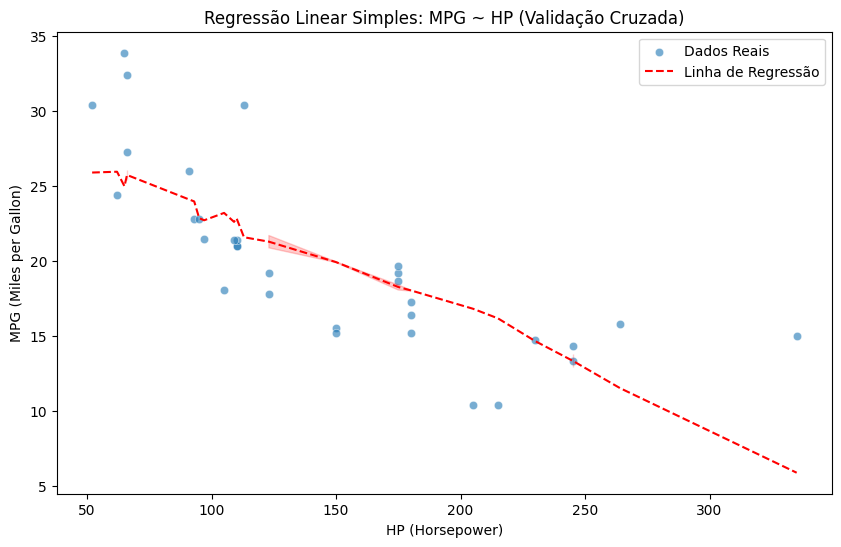

In [ ]:
#Realizar previsões de validação cruzada
y_pred_cv = cross_val_predict(lin_model, X, y, cv=kf)
# Criar o gráfico de dispersão com a linha de regressão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['hp'], y=y, label='Dados Reais', alpha=0.6)
sns.lineplot(x=X['hp'], y=y_pred_cv, color='red', label='Linha de Regressão', linestyle='--')
plt.xlabel('HP (Horsepower)')
plt.ylabel('MPG (Miles per Gallon)')
plt.title('Regressão Linear Simples: MPG ~ HP (Validação Cruzada)')
plt.legend()
plt.show()

Usando todas as variaveis:

In [ ]:
X = df.drop(columns=['mpg'])  # Usar todas as variáveis menos mpg
y = df['mpg']

# Definir modelo de regressão linear
lin_model_com_todas_variaveis = LinearRegression()

# Configurar a validação cruzada com KFold
kf = KFold(n_splits=5, shuffle=True, random_state=50)

# Executar validação cruzada e calcular o R²
scores = cross_val_score(lin_model, X, y, cv=kf, scoring='r2')
print(f'R2 por fold {scores}')

# Realizar previsões de validação cruzada
y_pred_cv = cross_val_predict(lin_model_com_todas_variaveis, X, y, cv=kf)

R2 por fold [ 0.46538428  0.79606714  0.81882435  0.02950312 -1.12152568]


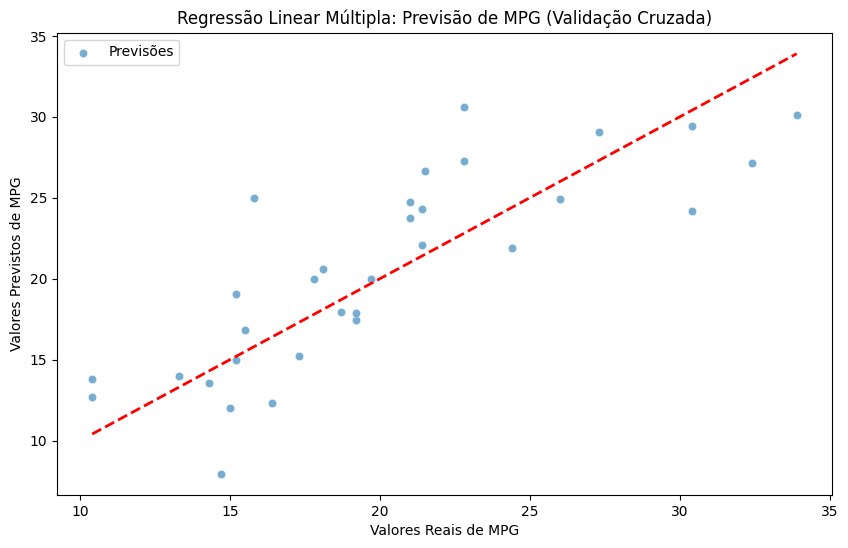

In [ ]:
# Criar o gráfico de dispersão para as previsões
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=y_pred_cv, label='Previsões', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Linha de identidade
plt.xlabel('Valores Reais de MPG')
plt.ylabel('Valores Previstos de MPG')
plt.title('Regressão Linear Múltipla: Previsão de MPG (Validação Cruzada)')
plt.legend()
plt.show()

Vamos calcular o VIP para detectar a colinearidade entre as variaveis independentes e ver se algo mudou no score.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calcular o VIF para cada variável
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Variable         VIF
0      cyl  112.629828
1     disp   98.930791
2       hp   56.047781
3     drat  132.214353
4       wt  182.948049
5     qsec  317.534376
6       vs    8.752581
7       am    7.412020
8     gear  119.804879
9     carb   32.213836


**Interpretação dos Resultados**

* VIF próximo de 1: Baixa ou nenhuma colinearidade.
* VIF entre 1 e 5: Colinearidade moderada (normalmente aceitável).
* VIF acima de 5: Indica alta colinearidade, o que pode impactar a interpretação dos coeficientes do modelo.


Os valores do VIF para as variáveis no dataset mtcars mostram evidências de colinearidade entre várias variáveis.
 Especificamente para a variável hp, seu VIF é 56.04, o que é considerado muito alto.  
 Isso significa que o modelo pode ter dificuldade em distinguir a contribuição exata de hp em relação às outras variáveis, o que torna os coeficientes de regressão menos estáveis. A alta colinearidade associada ao hp sugere que essa variável não é tão independente quanto parecia inicialmentee que embora hp tenha relevância na previsão de mpg, ela está fortemente correlacionada com outras variáveis como disp, wt, o que reduz sua importância individual quando essas variáveis são incluídas no modelo. VIF acima de 5 geralmente já é considerado um alerta para colinearidade, e valores acima de 10 indicam que a colinearidade é alta o suficiente para comprometer o modelo, por isso vemos que o r2 até piorou nos folds onde usamos todas as variaveis.
  Para lidar com essa colinearidade, seria necessário considerar técnicas como remoção de variáveis, análise de componentes principais (PCA)


**Exercicio 02**

Neste exercício usaremos um banco de dados da FIFA publicado em 2018 sobre jogadores de futebol. Faça uma regressão linear com esses dados e identifique os principais preditores baseados nos p−valores. Chame
o comando vif para calcular o fator de variance inflation discuta o resultado em termos de colinearidade e
as implicações para esta análise usando p−valores.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thec03u5/fifa-18-demo-player-dataset")

print("Path to dataset files:", path)

100%|██████████| 3.82M/3.82M [00:00<00:00, 154MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/thec03u5/fifa-18-demo-player-dataset/versions/5


In [ ]:
!pip install kaggle


In [ ]:
# Baixar o dataset do Kaggle
!kaggle datasets download -d thec03u5/fifa-18-demo-player-dataset

# Descompactar o arquivo baixado (caso seja um arquivo zip)
import zipfile
import os
import pandas as pd

# Extrair o arquivo ZIP baixado
with zipfile.ZipFile('fifa-18-demo-player-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('fifa_dataset')

# Exibir os arquivos extraídos para verificar o nome do arquivo CSV
print("Arquivos extraídos:", os.listdir('fifa_dataset'))

# Carregar o dataset (ajuste o nome do arquivo CSV conforme necessário)
df = pd.read_csv('fifa_dataset/CompleteDataset.csv')  # Ajuste para o nome exato do arquivo, se necessário

# Exibir as primeiras linhas do DataFrame
display(df)


Dataset URL: https://www.kaggle.com/datasets/thec03u5/fifa-18-demo-player-dataset
License(s): CC-BY-NC-SA-4.0
100% 3.82M/3.82M [00:00<00:00, 5.82MB/s]
100% 3.82M/3.82M [00:00<00:00, 4.26MB/s]
Arquivos extraídos: ['PlayerPlayingPositionData.csv', 'CompleteDataset.csv', 'PlayerAttributeData.csv', 'PlayerPersonalData.csv']


<ipython-input-4-227cd5e0558e>:17: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fifa_dataset/CompleteDataset.csv')  # Ajuste para o nome exato do arquivo, se necessário


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,17976,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17977,17977,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17978,17978,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,46,61,Swindon Town,https://cdn.sofifa.org/24/18/teams/1934.png,...,31.0,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,45.0
17979,17979,J. Lundstram,18,https://cdn.sofifa.org/48/18/players/238813.png,England,https://cdn.sofifa.org/flags/14.png,46,64,Crewe Alexandra,https://cdn.sofifa.org/24/18/teams/121.png,...,47.0,46.0,45.0,47.0,43.0,45.0,41.0,44.0,46.0,41.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Select the variables of interest
selected_columns = ['Age', 'Overall', 'Potential', 'Acceleration',
                    'Agility', 'Strength', 'Dribbling', 'Finishing',
                    'Vision', 'Short passing', 'Shot power', 'Stamina', 'Wage']
df = df[selected_columns]

# Define the function to convert 'Wage' to a numeric value
def convert_wage(wage):
    if pd.isnull(wage):
        return 0
    wage = str(wage)  # Ensure wage is a string
    wage = wage.replace('€', '').replace('K', 'e3').replace('M', 'e6')
    try:
        return float(eval(wage))
    except:
        return 0  # Return 0 if conversion fails

# Apply the function to convert 'Wage'
df['Wage'] = df['Wage'].apply(convert_wage)

# Convert all columns to numeric, coerce errors to NaN, and drop any remaining NaN rows
df = df.apply(pd.to_numeric, errors='coerce').dropna()

# Separate dependent and independent variables
X = df.drop('Wage', axis=1)  # Predictors
y = df['Wage']  # Target variable

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the linear regression model with statsmodels
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())


<ipython-input-5-493d3c583707>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wage'] = df['Wage'].apply(convert_wage)


                            OLS Regression Results                            
Dep. Variable:                   Wage   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     894.0
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:15:40   Log-Likelihood:            -1.9701e+05
No. Observations:               17541   AIC:                         3.940e+05
Df Residuals:                   17528   BIC:                         3.941e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.327e+05   2609.659    -50.851

O p--valor está associado a probabilidade de obter um resultado tão extremo quanto o observado sob a hipotese nula, basicamente ele mede a força da evidencia sob a hipotese nula. Um p valor baixo, significa que os resultados são improvaveis de ocorrer (apenas por acaso).

Nesse contexto aplicamos o p valor para determinar se uma variavel preditora tem um efeito estatistico significativo na variavel dependente.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calcular o VIF para cada variável
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

         Variable         VIF
0           const  358.150606
1             Age    4.333149
2         Overall    8.300170
3       Potential    6.059607
4    Acceleration    3.863187
5         Agility    3.891808
6        Strength    1.800063
7       Dribbling    8.889315
8       Finishing    4.348278
9          Vision    3.030555
10  Short passing    5.174945
11     Shot power    4.313106
12        Stamina    2.864528


Nesse caso, a conclusão que podemos chegar é que a colinearidade está distorcendo as estimativas dos coeficientes.

 Isso pode ser observado em variaveis com VIF alto e que ainda sim, tem p valores baixos, indicando que a colinearidade está afetando as estimativas do p valores, uma vez que o p valor é calculado com base na relação entre o coef e o erro padrão.

**Exercício 03**

Ao invés de usar p−valores para identificar os preditores com maior relevância, vamos usar o método Best
Subset Selection (BSS). Este método está implementando no pacote leaps. Para exercutar o método
basta chamar regsubsets com a fórmula para a regressão, o nível desejado e o parâmetro method como
"exhaustive". Para ver as variáveis escolhidas para cada nível (com números de preditores diferentes) basta
chamar a função tidy. O commando tidy também é importante. Ele retorna uma tibble com as variáveis incluídas em cada nível.
Para ficar mais fácil de visualizar essa tabela, fiz um pipe %>% do resultado para o comando View. As linhas
desta tabela representa os níveis e um valor de TRUE representa que a variável é incluida naquele nível.Você pode encontrar o melhor modelo dentre os níveis escolhendo o que possui maior R2.
Mas para tornar o resultado mais interessante, faça um gráfico do R2 ajustado a medida que o número de
preditores varia usando a tabela gerada pelo comando tidy.
 Quantos preditores você escolheria? (Neste
exercício, como não estamos usando o erro de validação, não se preocupe em calcular o standard error, use
somente o bom senso)


In [ ]:
def best_subset_selection(X, y, max_features=None):
   if max_features is None:
       max_features = X.shape[1]
   r2_adj_list = []  # Lista para armazenar R² ajustado
   subset_list = []  # Lista para armazenar os subconjuntos de preditores

   # Testar todos os tamanhos de subconjuntos de 1 até max_features
   for k in range(1, max_features + 1):
       best_r2_adj = -np.inf
       best_subset = None
       # Gerar todas as combinações de preditores com tamanho k
       for subset in combinations(X.columns, k):
           X_subset = X[list(subset)]
           # Treinar modelo de regressão linear
           model = LinearRegression().fit(X_subset, y)
           y_pred = model.predict(X_subset)
           # Calcular R² ajustado
           r2 = r2_score(y, y_pred)
           n = len(y)
           p = X_subset.shape[1]
           r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
           # Verificar se o R² ajustado é o melhor para o tamanho k
           if r2_adj > best_r2_adj:
               best_r2_adj = r2_adj
               best_subset = subset
       # Armazenar o melhor R² ajustado e o melhor subconjunto para o tamanho k
       r2_adj_list.append(best_r2_adj)
       subset_list.append(best_subset)
   return r2_adj_list, subset_list

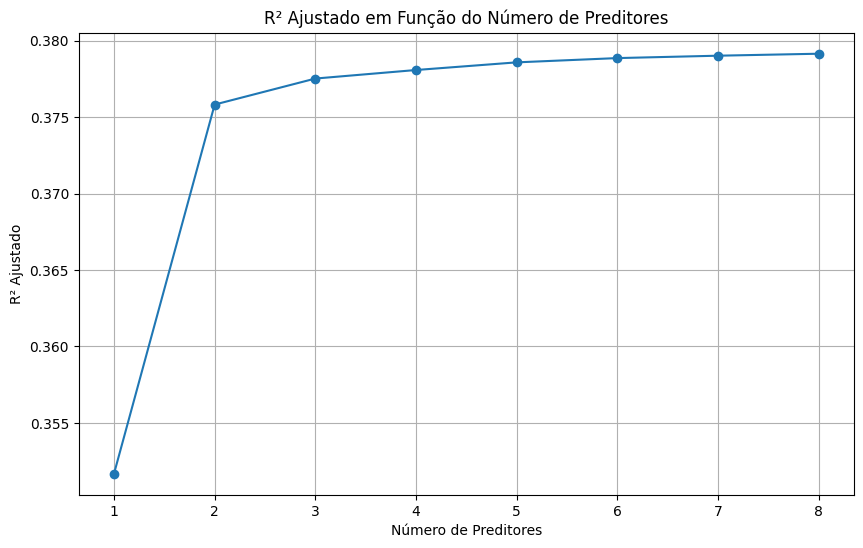

Melhor número de preditores: 8
Melhor subconjunto de preditores: ('Age', 'Overall', 'Potential', 'Acceleration', 'Agility', 'Strength', 'Finishing', 'Vision')


In [ ]:
X = df.drop('Wage', axis=1)
y = df['Wage']
max_features = 8  # Defina o número máximo de preditores a considerar
r2_adj_list, subset_list = best_subset_selection(X, y, max_features=max_features)
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_features + 1), r2_adj_list, marker='o')
plt.xlabel('Número de Preditores')
plt.ylabel('R² Ajustado')
plt.title('R² Ajustado em Função do Número de Preditores')
plt.grid(True)
plt.show()
# Mostrar o melhor subconjunto de preditores
best_num_predictors = np.argmax(r2_adj_list) + 1
best_subset = subset_list[best_num_predictors - 1]
print(f"Melhor número de preditores: {best_num_predictors}")
print(f"Melhor subconjunto de preditores: {best_subset}")

**Exercicio 04**

Vamos continuar usando o conjunto de dados da FIFA do exercício anterior, mas desta vez, vamos usar o
Forward Subset Selection (FSS) e vamos procurar dentre todos os níveis possíveis (com preditores variando
de 1 até 27 =ncol(df)-1)

Como feito no exercício anterior, faça um gráfico do R2 ajustado a medida que o número de preditores
aumenta.

Qual modelo você escolheria de acordo com esse critério do R2 ajustado?

Quais são as vantagens e desvantagens do método FSS em relação ao método BSS?

In [ ]:
# Baixar o dataset do Kaggle
!kaggle datasets download -d thec03u5/fifa-18-demo-player-dataset

# Descompactar o arquivo baixado (caso seja um arquivo zip)
import zipfile
import os
import pandas as pd

# Extrair o arquivo ZIP baixado
with zipfile.ZipFile('fifa-18-demo-player-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('fifa_dataset')

# Exibir os arquivos extraídos para verificar o nome do arquivo CSV
print("Arquivos extraídos:", os.listdir('fifa_dataset'))

# Carregar o dataset (ajuste o nome do arquivo CSV conforme necessário)
data = pd.read_csv('fifa_dataset/CompleteDataset.csv')  # Ajuste para o nome exato do arquivo, se necessário

# Exibir as primeiras linhas do DataFrame
display(data)

Dataset URL: https://www.kaggle.com/datasets/thec03u5/fifa-18-demo-player-dataset
License(s): CC-BY-NC-SA-4.0
fifa-18-demo-player-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Arquivos extraídos: ['PlayerPlayingPositionData.csv', 'CompleteDataset.csv', 'PlayerAttributeData.csv', 'PlayerPersonalData.csv']


<ipython-input-8-df8ff3a8f88a>:17: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('fifa_dataset/CompleteDataset.csv')  # Ajuste para o nome exato do arquivo, se necessário


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,17976,A. Kelsey,17,https://cdn.sofifa.org/48/18/players/237463.png,England,https://cdn.sofifa.org/flags/14.png,46,63,Scunthorpe United,https://cdn.sofifa.org/24/18/teams/1949.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17977,17977,B. Richardson,47,https://cdn.sofifa.org/48/18/players/11728.png,England,https://cdn.sofifa.org/flags/14.png,46,46,Wycombe Wanderers,https://cdn.sofifa.org/24/18/teams/1933.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17978,17978,J. Young,17,https://cdn.sofifa.org/48/18/players/231381.png,Scotland,https://cdn.sofifa.org/flags/42.png,46,61,Swindon Town,https://cdn.sofifa.org/24/18/teams/1934.png,...,31.0,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,45.0
17979,17979,J. Lundstram,18,https://cdn.sofifa.org/48/18/players/238813.png,England,https://cdn.sofifa.org/flags/14.png,46,64,Crewe Alexandra,https://cdn.sofifa.org/24/18/teams/121.png,...,47.0,46.0,45.0,47.0,43.0,45.0,41.0,44.0,46.0,41.0


In [ ]:
data.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [15]:
# Select the relevant columns
selected_columns = ['Age', 'Overall', 'Potential', 'Acceleration', 'Agility',
                   'Strength', 'Dribbling', 'Finishing', 'Vision',
                   'Short passing', 'Shot power', 'Stamina', 'Ball control',
                   'Crossing', 'Curve', 'Positioning', 'Long passing',
                   'Marking', 'Interceptions', 'Heading accuracy', 'Jumping',
                   'Penalties', 'Balance', 'Composure', 'Reactions',
                   'Volleys', 'Aggression', 'Wage']

data = data[selected_columns]
# Função para converter 'Wage' para númerico
def convert_wage(wage):
   if isinstance(wage, str):
       wage = wage.replace('€', '').replace('K', 'e3').replace('M', 'e6')
       try:
           return float(eval(wage))
       except:
           return np.nan
   return wage
# Função para converter strings no formato 00+0 ´para soma númerica
def convert_aggregated_values(value):
   if isinstance(value, str):
       if '+' in value:
           try:
               return sum(map(int, value.split('+')))
           except:
               return np.nan
       try:
           return float(value)
       except:
           return np.nan
   return value
# Aplica a conversão no wage
data['Wage'] = data['Wage'].apply(convert_wage)
# Convert all other columns to numeric
for col in data.columns:
   if col != 'Wage':
       data[col] = data[col].apply(convert_aggregated_values)

#
data = data.dropna()
# Separate dependent and independent variables
X = data.drop('Wage', axis=1)
y = data['Wage']
# Verify the number of features
max_features = X.shape[1]
# Create the linear regression model
model = LinearRegression()
# Implement Forward Subset Selection (FSS)
sfs = SFS(model,
         k_features=(1, max_features),
         forward=True,
         floating=False,
         scoring='r2',
         cv=5)
# Fit SFS
sfs = sfs.fit(X, y)
# Get the selected features
selected_features = list(sfs.k_feature_names_)
print(f"Selected features: {selected_features}")
# Ajusta R²
r2_adj = sfs.k_score_
print(f"Adjusted R²: {r2_adj}")

r2_adj_list = [sfs.subsets_[i]['avg_score'] for i in range(1, len(sfs.subsets_)+1)]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be

Selected features: ['Stamina', 'Crossing', 'Curve', 'Positioning', 'Marking', 'Interceptions', 'Jumping', 'Penalties', 'Balance', 'Composure', 'Volleys']
Adjusted R²: -12.719322679542568


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


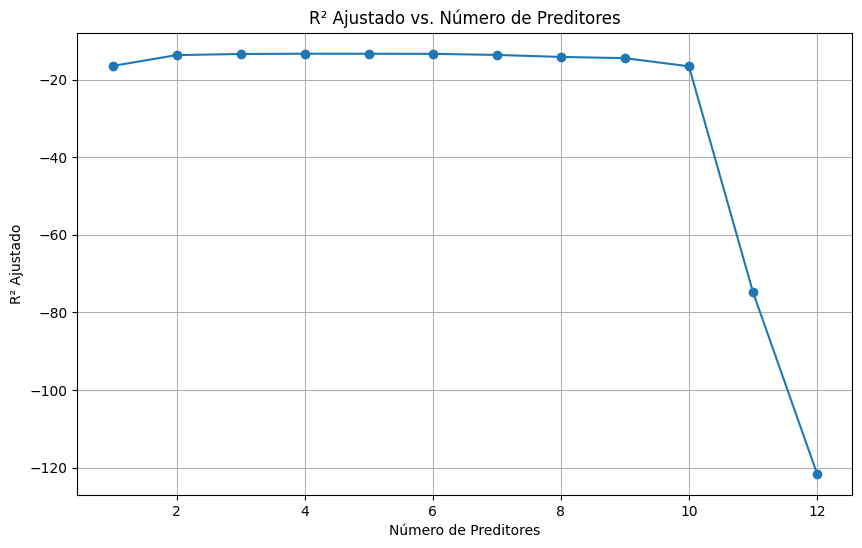

In [ ]:
# R² ajustado para cada número de variáveis
r2_adj_list = [sfs.subsets_[i]['avg_score'] for i in range(1, len(sfs.subsets_)+1)]
# Plotar o gráfico do R² ajustado
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(r2_adj_list)+1), r2_adj_list, marker='o')
plt.xlabel('Número de Preditores')
plt.ylabel('R² Ajustado')
plt.title('R² Ajustado vs. Número de Preditores')
plt.grid(True)
plt.show()

O R2 para este modelo ficou baixo, o que significa que mesmo ajustando o as variaveis preditoras e o r2 não aumentando e estando negativado o modelo não está conseguindo explicar a variabilidade da variavel target.
Isso sugere que a relação entre variaveis preditora e variavel target podem não ser linear.
Para lidar com relações não lineares e ser mais flexivel podemos usar algoritmos mais robustos e que capturem melhor relações não lineares como, random forest, xb boost e svr.

As vantagens do FSS é ser computacionamente mais leve e eficiente do que o BSS, quando temos muitas variaveis para testar, o treino do modelo pode consumir muito da maquina. Nesse caso o FSS é util pois o modelo começa sem variaveis e aos poucos elas são adcionadas, e com isso diminui o overfitting  já que é propenso a ter menos variaveis irrelevantes. Mas, com isso o FSS pode ignorar interações importantes entre variaveis, já que ele adciona sem avaliar todas as combinações possíveis.

**Exercicio 05**

No exercício anterior, usamos o R2 ajustado para escolher o melhor conjunto de preditores para o nosso
modelo. Para termos uma medida melhor do erro, o ideal seria escolher o número de preditores usando
validação cruzada.
Para isso, usaremos o comando vfold_cv para gerar a partição dos dados em folds. Escolhemos v = 10
abaixo para fazer um 10−fold.
cv.split = vfold_cv(df,v=10)

In [16]:
from sklearn.model_selection import KFold

In [17]:
# Definir validação cruzada com 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Criar o modelo de regressão linear
model = LinearRegression()
# Matriz para armazenar o MSE de cada fold e conjunto de preditores
results = np.zeros((10, X.shape[1]))
# Loop pelos folds da validação cruzada
for fold, (train_index, test_index) in enumerate(kf.split(X)):
   # Separar dados de treinamento e teste
   X_train, X_test = X.iloc[train_index], X.iloc[test_index]
   y_train, y_test = y.iloc[train_index], y.iloc[test_index]
   # Implementar o FSS para o conjunto de treinamento
   sfs = SFS(model,
             k_features=(1, X.shape[1]),
             forward=True,
             floating=False,
             scoring='neg_mean_squared_error',
             cv=5)
   sfs = sfs.fit(X_train, y_train)
   # Loop para cada número de preditores selecionados pelo FSS
   for num_predictors in range(1, X.shape[1] + 1):
       # Obter o subconjunto de preditores selecionados
       selected_features = list(sfs.subsets_[num_predictors]['feature_names'])
       # Ajustar o modelo no conjunto de treinamento com o subconjunto de preditores
       model.fit(X_train[selected_features], y_train)
       # Fazer previsões no conjunto de teste
       y_pred = model.predict(X_test[selected_features])
       # Calcular o MSE
       mse = mean_squared_error(y_test, y_pred)
       # Armazenar o MSE no resultado
       results[fold, num_predictors - 1] = mse
# Calcular a média do MSE para cada número de preditores
mean_mse = results.mean(axis=0)

A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.p

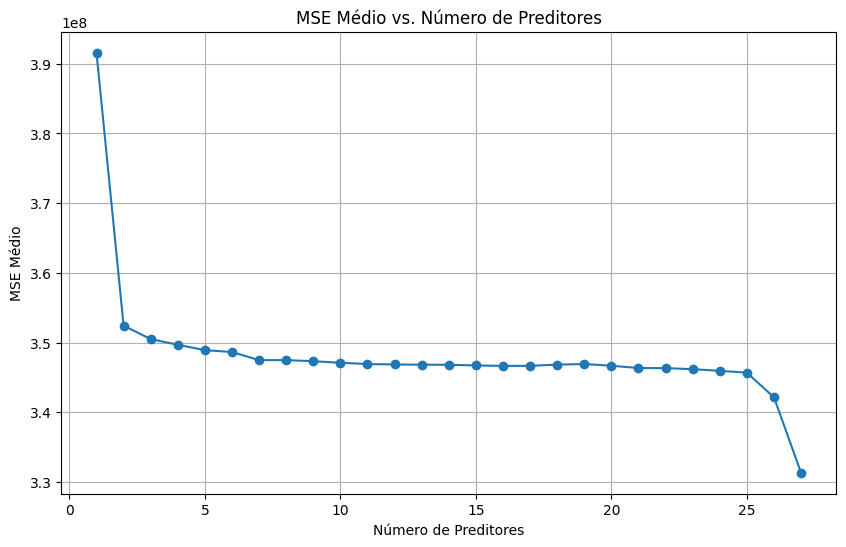

Melhor número de preditores: 27


In [18]:
# Visualizar o MSE médio em função do número de preditores
plt.figure(figsize=(10, 6))
plt.plot(range(1, X.shape[1] + 1), mean_mse, marker='o')
plt.xlabel('Número de Preditores')
plt.ylabel('MSE Médio')
plt.title('MSE Médio vs. Número de Preditores')
plt.grid(True)
plt.show()
# Encontrar o número de preditores com menor MSE médio
best_num_predictors = np.argmin(mean_mse) + 1
print(f"Melhor número de preditores: {best_num_predictors}")